# 목표 : 생선 분류 모델 
- 데이터 : fish.csv
- feature : 5개 Weight	Length	Diagonal	Height	Width
- target : 1개 Species
- 방법 : 지도학습 + 다중분류 

## 1. 모듈 로딩 & 데이터 준비

In [100]:
# 모듈 로딩
import pandas as pd
import numpy as np 

In [101]:
# 데이터 준비
data_file = "../data/fish.csv"
fishDF = pd.read_csv(data_file)
fishDF.head(2) # 기본 정보 확인

Species  Weight  Length  Diagonal  Height   Width
0   Bream   242.0    25.4      30.0   11.52  4.0200
1   Bream   290.0    26.3      31.2   12.48  4.3056

## 2. 학습을 위한 데이터 준비

### 2-1. 피쳐 / 타겟 분리

In [102]:
featureDF = fishDF[fishDF.columns[1:]]
targetDF = fishDF[fishDF.columns[0]]

In [103]:
targetDF.shape , featureDF.shape

((159,), (159, 5))

In [104]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(targetDF)

LabelEncoder()

In [105]:
targetDF = encoder.transform(targetDF)
targetDF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

inverse_transform 하면 다시 돌려줌 

In [106]:
# 타겟의 클래스 수 확인 
# targetDF.nunique()

In [107]:
# 타겟 클래스 별 데이터 수 확인 
# targetDF.value_counts() / targetDF.shape[0] # 비율 

### 2-2. 학습용/테스트용 데이터셋 준비

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, stratify=targetDF, random_state=11)

In [110]:
print(f"[Train Dataset] {X_train.shape}, {y_train.shape}")
print(f"[Test Dataset] {X_test.shape}, {y_test.shape}")

[Train Dataset] (119, 5), (119,)
[Test Dataset] (40, 5), (40,)


## 3. 학습 진행 

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
# 모델 인스턴스 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
model = LogisticRegression(max_iter=20000, solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000, solver='liblinear')

In [114]:
# 모델 파라미터 확인 
print(f"classes_ : {model.classes_}")
print(f"feature_names_in_ : {model.feature_names_in_}")
print(f"max_iter : {model.max_iter}")
print(f"coef_ : {len(model.coef_)}개")

classes_ : [0 1 2 3 4 5 6]
feature_names_in_ : ['Weight' 'Length' 'Diagonal' 'Height' 'Width']
max_iter : 20000
coef_ : 7개


## 4. 평가

In [115]:
print(f"[Train Score] {model.score(X_train, y_train)}\n[Test Score] {model.score(X_test, y_test)}")

[Train Score] 0.9495798319327731
[Test Score] 0.975


## 5. 모델 활용

In [116]:
y_pre = model.predict(X_test.iloc[[0]])
y_pre, y_test[:1]

(array([0]), array([0]))

In [117]:
model.predict_proba(X_test.iloc[[0]]) # 확률이 가장 높은 애가 bream 이었던 것임 

array([[5.04315647e-01, 3.10853586e-01, 3.75723755e-04, 2.25202324e-07,
        1.72946819e-01, 6.17918834e-13, 1.15079995e-02]])

In [118]:
# 5개 데이터에 대한 생선 분류 예측
np.round(model.predict_proba(X_test.iloc[:5]),3)

array([[0.504, 0.311, 0.   , 0.   , 0.173, 0.   , 0.012],
       [0.158, 0.73 , 0.044, 0.   , 0.057, 0.   , 0.01 ],
       [0.772, 0.024, 0.001, 0.   , 0.18 , 0.   , 0.023],
       [0.001, 0.089, 0.719, 0.002, 0.155, 0.004, 0.03 ],
       [0.   , 0.021, 0.753, 0.009, 0.176, 0.009, 0.031]])

In [119]:
model.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [120]:
result = np.round(model.predict_proba(X_test.iloc[:5]),3).argmax(axis=1)
result

array([0, 1, 0, 2, 2], dtype=int64)

In [135]:
data = {"Pre Y":[model.classes_[idx] for idx in result],
       "True Y":list(y_test[:5]) }

In [136]:
pd.DataFrame(data)

Pre Y  True Y
0      0       0
1      1       1
2      0       0
3      2       2
4      2       2

## <hr>6. 모델 성능 평가 
- 정확도
- 정밀도
- 재현율
- F1-Score
- Confusion Matrics
- Classification Report
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [123]:
from sklearn.metrics import accuracy_score, f1_score\
,precision_score, recall_score, confusion_matrix, classification_report

In [124]:
print(classification_report(y_test, model.predict(X_test))) # 답지, 예측치 
# class -> Bream,  parkki, ...Whitefish

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       0.00      0.00      0.00         1

    accuracy                           0.97        40
   macro avg       0.85      0.86      0.85        40
weighted avg       0.95      0.97      0.96        40



C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
f1_score(y_test, model.predict(X_test), average="micro") # 숫자가 아닌 애들이 있어서 그럼 넣기 전에 바꿔야 함  

0.975

In [126]:
recall_score(y_test, model.predict(X_test), average="micro")

0.975

In [131]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [132]:
model.classes_, encoder.inverse_transform(model.classes_)

(array([0, 1, 2, 3, 4, 5, 6]),
 array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
       dtype=object))

In [133]:
print("타겟 라벨", model.classes_)
labels = encoder.inverse_transform(model.classes_)
print("타겟 문자열", labels)

타겟 라벨 [0 1 2 3 4 5 6]
타겟 문자열 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


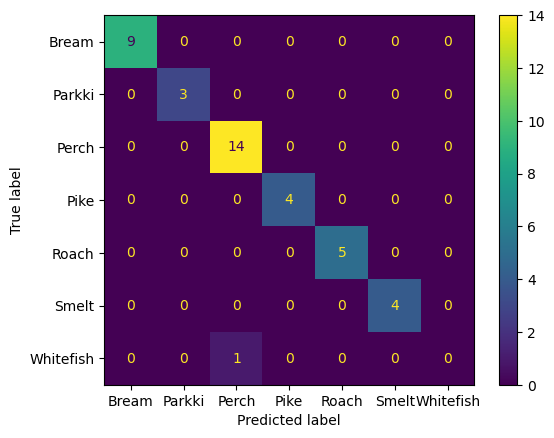

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmplot = ConfusionMatrixDisplay(cm, display_labels=labels)
cmplot.plot()
plt.show()